Code von der Blog Seite: 
    http://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
    
Things to try:
* Batch Normalization
* Dropout
* LSTM longer
* More Layers
* Scale of Data (z-Transformation)

In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import pandas as pd
import time
import datetime
import sys
%matplotlib inline

def dateparse (ts_str):    
    return datetime.datetime.strptime(ts_str, '%Y%m%d_%H:%M:%S')

df = pd.read_csv('data/LU_dat/VSP_86303/all_together.csv.gz', compression='gzip', index_col='timestamp', parse_dates=True, date_parser=dateparse)

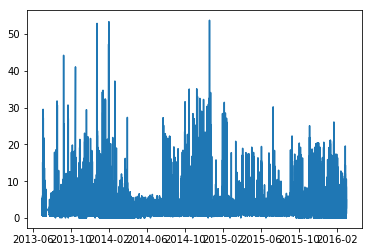

In [2]:
dataset = df[df['PQ_SVCT'] < 15000]['PQ_SVCT']
plt.plot(dataset)
plt.show()

In [41]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [5]:
# load the dataset
dataframe = dataset = df[df['PQ_SVCT'] < 15000]['PQ_SVCT']
dataset = dataframe.values
dataset = dataset.astype('float32')

In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

/usr/local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [7]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
print(len(train), len(test))

177058 87208


In [8]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return numpy.array(dataX), numpy.array(dataY)

In [9]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [24]:
testX

array([[[ 0.0224858 ,  0.02934792,  0.03675926, ...,  0.03196612,
          0.03709528,  0.02002791]],

       [[ 0.02934792,  0.03675926,  0.03222837, ...,  0.03709528,
          0.02002791,  0.02390709]],

       [[ 0.03675926,  0.03222837,  0.03328696, ...,  0.02002791,
          0.02390709,  0.01915136]],

       ..., 
       [[ 0.03570437,  0.04016875,  0.07308899, ...,  0.06363191,
          0.09945931,  0.06808458]],

       [[ 0.04016875,  0.07308899,  0.06841649, ...,  0.09945931,
          0.06808458,  0.06248099]],

       [[ 0.07308899,  0.06841649,  0.06991841, ...,  0.06808458,
          0.06248099,  0.07665111]]], dtype=float32)

In [25]:
testY

array([ 0.02390709,  0.01915136,  0.02004223, ...,  0.06248099,
        0.07665111,  0.10568947], dtype=float32)

In [10]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [13]:
# create and fit the LSTM network
print(len(train))
model = Sequential()
model.add(LSTM(4, input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

177058
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 4)                 240       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 245.0
Trainable params: 245
Non-trainable params: 0.0
_________________________________________________________________


In [14]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
779s - loss: 4.5059e-04
Epoch 2/100
776s - loss: 4.3136e-04
Epoch 3/100
777s - loss: 4.2663e-04
Epoch 4/100
778s - loss: 4.2408e-04
Epoch 5/100
778s - loss: 4.2248e-04
Epoch 6/100
779s - loss: 4.1836e-04
Epoch 7/100
778s - loss: 4.1930e-04
Epoch 8/100
778s - loss: 4.1851e-04
Epoch 9/100
779s - loss: 4.1710e-04
Epoch 10/100
778s - loss: 4.1549e-04
Epoch 11/100
778s - loss: 4.1772e-04
Epoch 12/100
777s - loss: 4.1531e-04
Epoch 13/100
778s - loss: 4.1557e-04
Epoch 14/100
780s - loss: 4.1600e-04
Epoch 15/100
778s - loss: 4.1441e-04
Epoch 16/100
778s - loss: 4.1474e-04
Epoch 17/100
777s - loss: 4.1403e-04
Epoch 18/100
778s - loss: 4.1535e-04
Epoch 19/100
778s - loss: 4.1506e-04
Epoch 20/100
777s - loss: 4.1386e-04
Epoch 21/100
777s - loss: 4.1196e-04
Epoch 22/100
777s - loss: 4.1201e-04
Epoch 23/100
778s - loss: 4.1404e-04
Epoch 24/100
778s - loss: 4.1339e-04
Epoch 25/100
778s - loss: 4.1261e-04
Epoch 26/100
778s - loss: 4.1268e-04
Epoch 27/100
778s - loss: 4.1215e-04
Epoch 28/1

In [15]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
invTrainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
invTestY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(invTrainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(invTestY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.08 RMSE
Test Score: 1.08 RMSE


/usr/local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


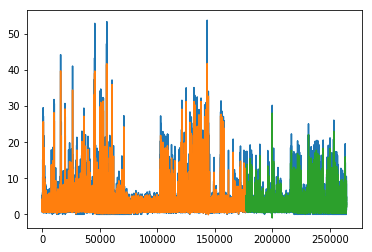

In [16]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back] = np.reshape(trainPredict, len(trainPredict))
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1] = np.reshape(testPredict, len(testPredict))
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

/usr/local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


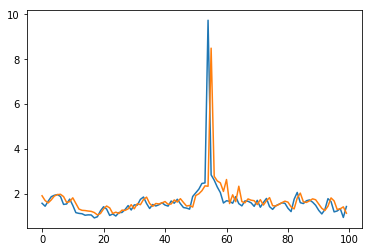

In [17]:
plt.plot(scaler.inverse_transform(dataset)[200000:200100])
plt.plot(testPredictPlot[200000:200100])

In [18]:
scaler.inverse_transform(dataset)[len(trainPredictPlot):len(trainPredictPlot)+100]
print(len(trainPredictPlot))
print(len(dataset))

264266
264266


/usr/local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [19]:
model.save('LA10.h5')

In [40]:
generated = []
start_index = 200000
diversity = 0.1
maxlen = 40
sentence = testPredictPlot[start_index: start_index + maxlen]
generated = np.append(generated, sentence)
print(sentence)

[ 1.91907084  1.70657444  1.60255265  1.73680854  1.90671551  1.97060359
  1.98506188  1.88324654  1.62353158  1.65880525  1.82826269  1.57784617
  1.32912481  1.27224863  1.26152921  1.23996603  1.22506452  1.17292023
  1.06711197  1.12914312  1.3311044   1.46325564  1.38102388  1.13173258
  1.18936527  1.13214135  1.28048599  1.26844728  1.33515096  1.52289271
  1.33876705  1.56873918  1.52209127  1.75259483  1.85860574  1.57606447
  1.44738674  1.57580245  1.555637    1.60078061]


In [44]:
model = load_model('LA10.h5')

In [47]:
def generate_sample(count=400):
    generated = []
    start_index = 200000
    diversity = 0.1
    maxlen = 32 * look_back
    sentence = testPredictPlot[start_index: start_index + maxlen]
    generated = np.append(generated, sentence)
    
    for i in range(count):
        preds = (model.predict(sentence.reshape(32,1,look_back), verbose=0))[0,-1]
        #print(preds)
        generated = np.append(generated, preds)
        sentence = np.append(sentence[1:], preds)
    
    return generated

/usr/local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


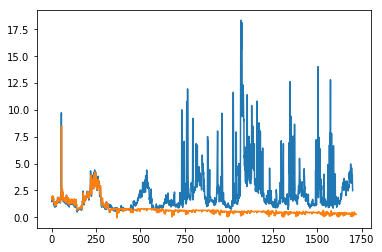

In [49]:
plt.plot(scaler.inverse_transform(dataset)[200000:201700])
plt.plot(generate_sample(1400))

/usr/local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


(1400,)


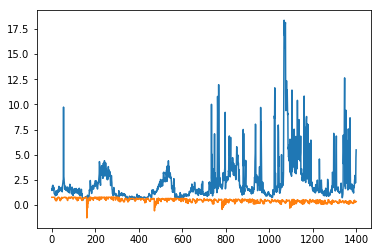

In [50]:
def generate_sample(start_index = 200000, count=400):
    generated = []
    diversity = 0.1
    maxlen = 32 * look_back
    sentence = testPredictPlot[start_index: start_index + maxlen]
    generated = np.append(generated, sentence)
    
    for i in range(count):
        preds = (model.predict(sentence.reshape(32,1,look_back), verbose=0))[0,-1]
        generated = np.append(generated, preds)
        sentence = np.append(sentence[1:], preds)
    
    #print(generated.shape)
    return generated

pred_start  = 32 * look_back
start_index = 200000 - pred_start
count       = 1400
plt.plot(scaler.inverse_transform(dataset)[start_index + pred_start:start_index + pred_start + count])
samples = generate_sample(start_index, count)[pred_start:]
print(samples.shape)
plt.plot(samples)